#### Insights and Visualizations from the Dataset

Generating insights from the data and visualizing the the data using plots is the gold of every data analysis task. It is inherent of the preceeding process of data gathering, assessment and cleaning as their end product influences the quality of the story the data presents.  
The data gathered through the twitter website using  the twitter API, the provided data and the data downloaded from the provided URL after being combined to a single dataframe, insights generate includes  
1. what are most common dog name in the dataset

2. what is the summary statistics of the dog ratings

3. How distributed are the various dog_stages within the dataset


Inorder to to be able to generate the above mentioned insights, the following libraries are imported:


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# reading the data to a dataframe to easily derive the insights and visuals is the first thing to do
df = pd.read_csv('twitter_archive_master.csv')


#### Insight 1.


In [8]:
df.name.value_counts()

A          55
Charlie    11
Penny      10
Tucker     10
Cooper     10
           ..
Darby       1
Crouton     1
Brockly     1
Spanky      1
Zara        1
Name: name, Length: 935, dtype: int64

From the code, it is visibly clear that 'A' is the most common dog followed by 'Charlie' 

#### Insight 2.
This code gives the summary statistics of the dog ratings 


In [9]:
df.rating_ratio.describe()

count    2073.00000
mean        1.17189
std         3.98872
min         0.00000
25%         1.00000
50%         1.10000
75%         1.20000
max       177.60000
Name: rating_ratio, dtype: float64

From the summary statistics, there are a total of 2073 ratings in the dataset. The worst rate is 0, the best is 177.6 and a mean of 1.17. 

#### Insight 3

In [ ]:
An isight which is nice to show is how distributed the various dog stages are within the dataset 

In [11]:
dog_stage_dist = df.dog_stage.value_counts()
dog_stage_dist

pupper           227
doggo             66
puppo             28
doggo|pupper      11
floofer            3
doggo|floofer      1
doggo|puppo        1
Name: dog_stage, dtype: int64

In [17]:
#this codes adjust the timestamp column once more to date time format 
df['timestamp'] = pd.to_datetime(df['timestamp'])

To visualize the above result in a plot will be a better way to display the result

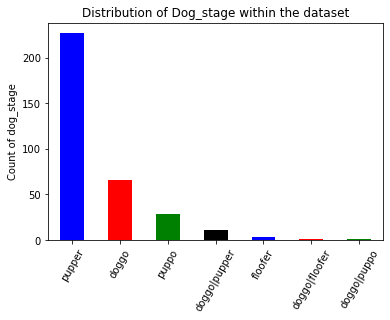

In [18]:
dog_stage_dist.plot(kind='bar', color =['blue', 'red', 'green', 'black'], title = 'Distribution of Dog_stage within the dataset')
plt.xticks(rotation=60)
plt.ylabel('Count of dog_stage')
plt.show()

#### Created Visualization

I think it is of importance is to see how new tweets are created as time passes.
The codes below are used to achieve that


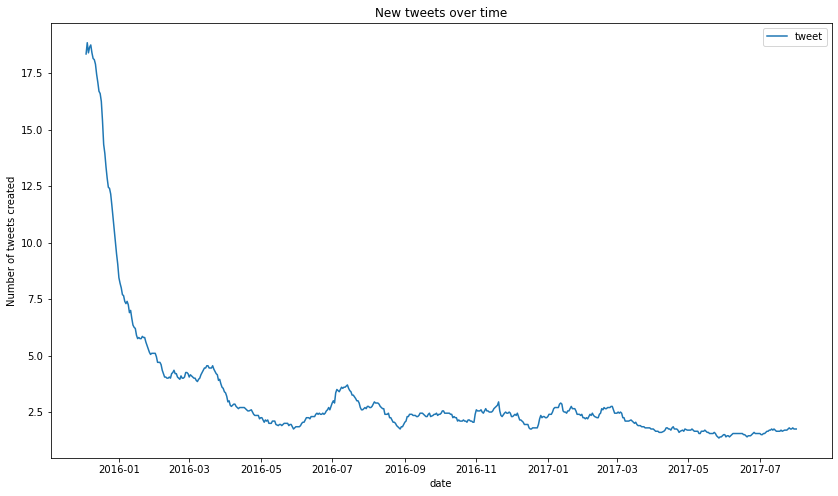

In [19]:
# creation of two columns ('date' and 'tweet') to aggregate the datetime
df['date'] = df['timestamp'].dt.date

df['tweet'] = 1

# this code Creates a new dataframe with 2 columns, gruped by date
new_df = df[['date', 'tweet']].groupby(['date']).sum() 

# Use moving averages to smooth the line
new_df['tweet'] = new_df['tweet'].rolling(window=20).mean()

# Plot
new_df.plot(figsize=(14, 8), title='New tweets over time')
plt.ylabel('Number of tweets created')
plt.show()

From the plot, it clearly seen that tweet creation decreases as time passes on. The plot shows there were more than 18 tweets on average created per day at the beginning of 2016 but this frequency droped to about 3 on average in 2016 and gradually reduces in 2017. This could simply be as a result of people been occupied by other trending information and having less time to creat tweets to rate dogs